# Trabajo de Juan

## Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago
de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo
que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

* **Fecha-I** : Fecha y hora programada del vuelo.
* **Vlo-I** : Número de vuelo programado.
* **Ori-I** : Código de ciudad de origen programado.
* **Des-I** : Código de ciudad de destino programado.
* **Emp-I** : Código aerolínea de vuelo programado.
* **Fecha-O** : Fecha y hora de operación del vuelo.
* **Vlo-O** : Número de vuelo de operación del vuelo.
* **Ori-O** : Código de ciudad de origen de operación
* **Des-O** : Código de ciudad de destino de operación.
* **Emp-O** : Código aerolínea de vuelo operado.
* **DIA** : Día del mes de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLAORI** : Nombre ciudad origen.
* **SIGLADES** : Nombre ciudad destino.

## Desarrollo

### 0. Obtención de datos

In [330]:
#Se importan las librerías necesarias para el problema
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msng
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [331]:
df = pd.read_csv('dataset_SCL.csv')

In [332]:
df.shape

(68206, 18)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


<AxesSubplot:>

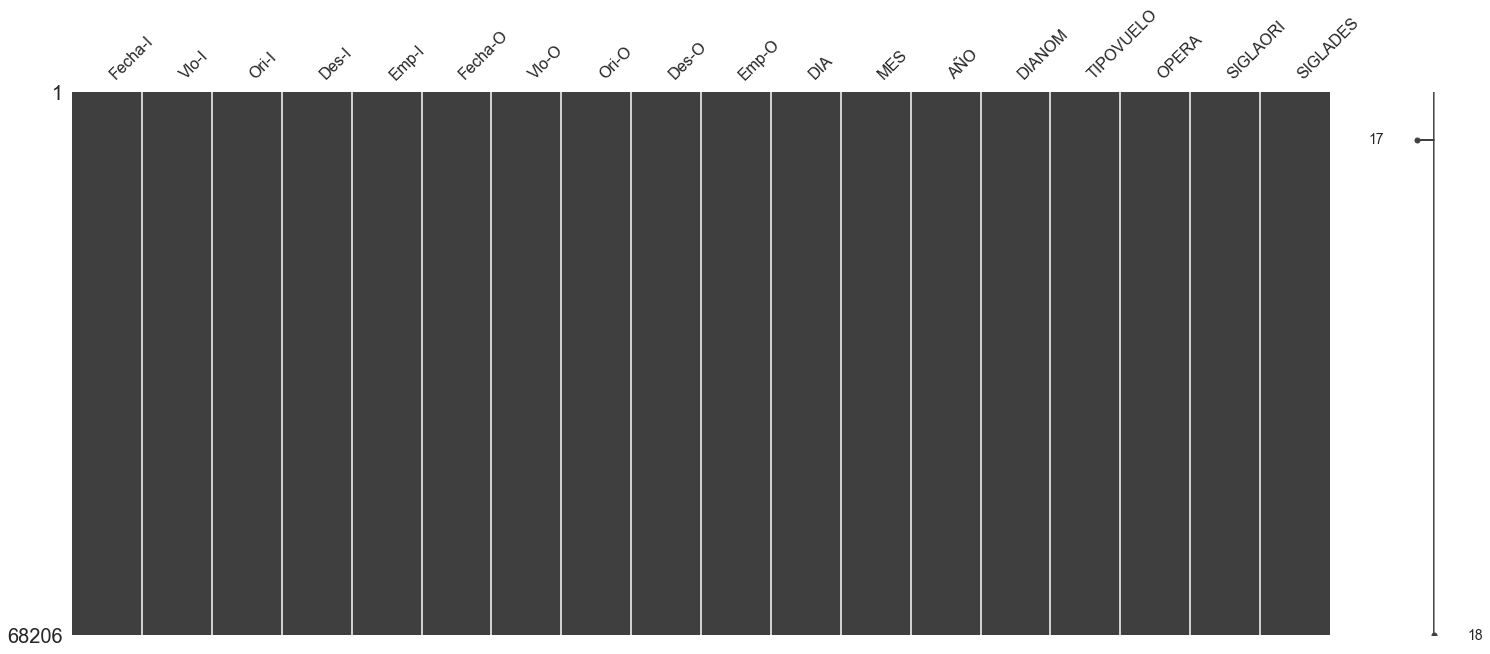

In [334]:
msng.matrix(df)

In [335]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

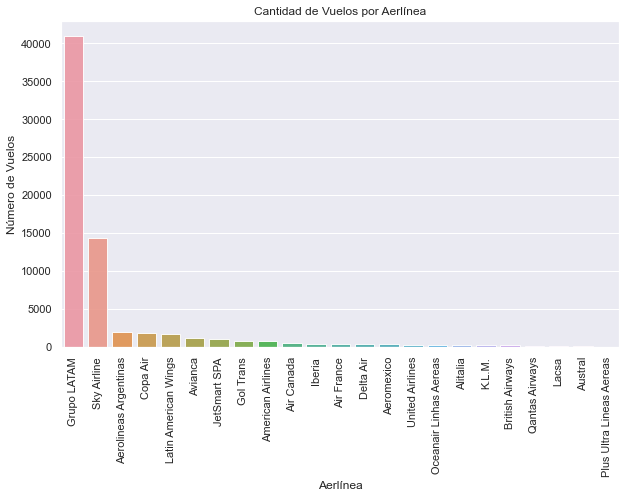

In [336]:
vuelos_aerolineas = df['OPERA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style="darkgrid")
sns.barplot(vuelos_aerolineas.index, vuelos_aerolineas.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Aerlínea')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Aerlínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

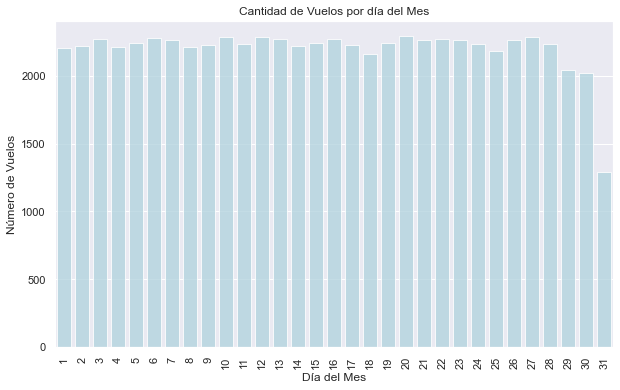

In [337]:
vuelos_dia = df['DIA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style = "darkgrid")
sns.barplot(vuelos_dia.index, vuelos_dia.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

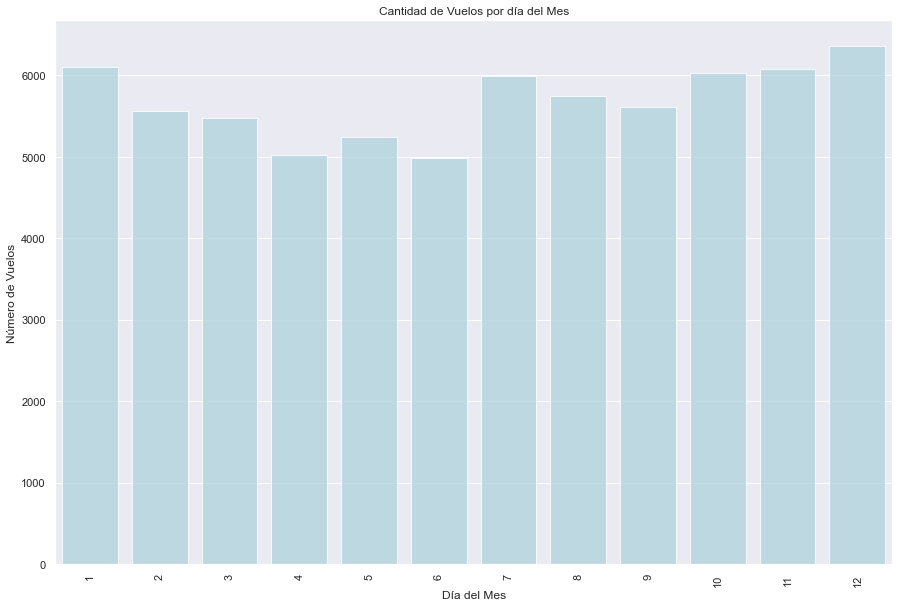

In [338]:
vuelos_mes = df['MES'].value_counts()
sns.set(style = "darkgrid")
sns.barplot(vuelos_mes.index, vuelos_mes.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

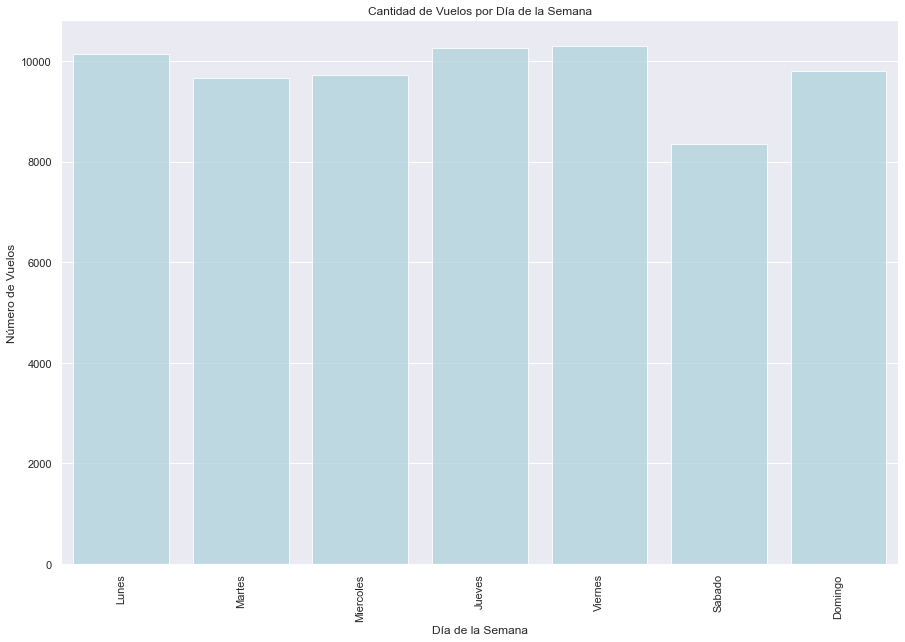

In [339]:
vuelos = df['DIANOM'].value_counts()
dias = [vuelos.index[2], vuelos.index[5], vuelos.index[4], vuelos.index[1], vuelos.index[0], vuelos.index[6], vuelos.index[3]]
valores_dias = [vuelos.values[2], vuelos.values[5], vuelos.values[4], vuelos.values[1], vuelos.values[0], vuelos.values[6], vuelos.values[3]]

sns.set(style="darkgrid")
sns.barplot(dias, valores_dias, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Día de la Semana')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.xticks(rotation=90)
plt.show()

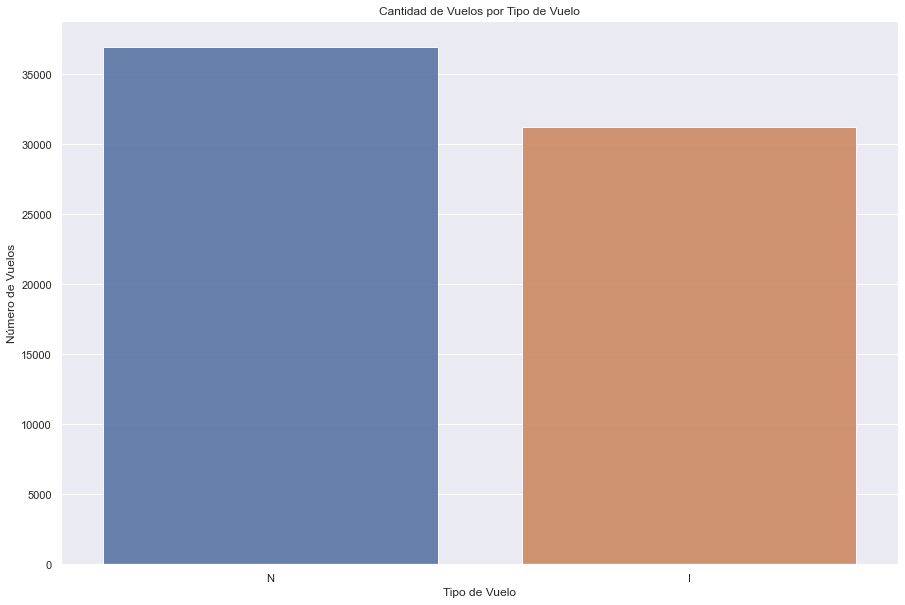

In [340]:
vuelos = df['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
sns.barplot(vuelos.index, vuelos.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Tipo de Vuelo')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.show()

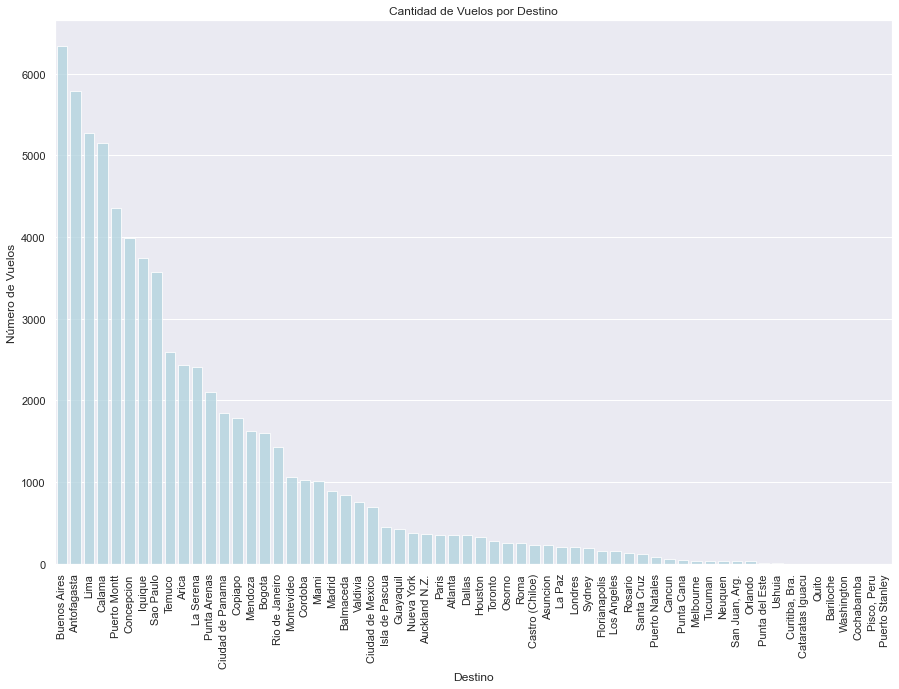

In [341]:
vuelos = df['SIGLADES'].value_counts()
sns.set(style="darkgrid")
sns.barplot(vuelos.index, vuelos.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Destino')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)

plt.show()

Respecto a las distribuciones, se puede ver que dentro de todo la data está distribuida de manera bastante balanceada. De todas formas se pueden notar ciertas particularidades en algunas columnas: 
* En las aerolíneas LATAM Airlines es la con mayor cantidad de vuelo debido a que es la más grande aquí en chile y es la que tiene mayor cantidad de destinos. SKY Airlines sería la segunda más grande y de ahí en adelante las demás son bastante similares en cuanto a vuelos. 
* En cuanto a los días del mes, se puede ver como el día 31 tiene menor cantidad que los demás días y esto se puede deber a que hay menos días 31 durante el año.
* Con los días de semana, el día sábado es el único en el que se nota una diferencia. Aquí puede ser porque la gente prefiere ese día para quedarse en donde sea que esté y aprovecharlo en caso que esté de viaje para poder recorrer o solamente descansar.
* Por parte de los destinos se puede ver que gran parte se lo llevan las ciudades chilenas del norte. Esto puede ser por un alto flujo en minería.

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

* **temporada_alta** : 1 si **Fecha-I** está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no

In [342]:
from datetime import datetime

def temporada_alta(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0
    

In [343]:
df['temporada_alta'] = df['Fecha-I'].apply(temporada_alta)

In [344]:
df['temporada_alta'].value_counts()

0    46174
1    22032
Name: temporada_alta, dtype: int64

* **dif_min** : diferencia en minutos entre **Fecha-O** y **Fecha-I** .

In [345]:
def dif_min(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    dif_min = ((fecha_o - fecha_i).total_seconds())/60
    return dif_min
        

In [346]:
df['dif_min'] = df.apply(dif_min, axis = 1)

* **atraso_15** : 1 si **dif_min** > 15, 0 si no.

In [347]:
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)

In [348]:
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

* **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a **Fecha-I**.

In [349]:
def get_periodo_dia(fecha):
    fecha_time = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S').time()
    mañana_min = datetime.strptime("05:00", '%H:%M').time()
    mañana_max = datetime.strptime("11:59", '%H:%M').time()
    tarde_min = datetime.strptime("12:00", '%H:%M').time()
    tarde_max = datetime.strptime("18:59", '%H:%M').time()
    noche_min1 = datetime.strptime("19:00", '%H:%M').time()
    noche_max1 = datetime.strptime("23:59", '%H:%M').time()
    noche_min2 = datetime.strptime("00:00", '%H:%M').time()
    noche_max2 = datetime.strptime("4:59", '%H:%M').time()
    
    if(fecha_time > mañana_min and fecha_time < mañana_max):
        return 'mañana'
    elif(fecha_time > tarde_min and fecha_time < tarde_max):
        return 'tarde'
    elif((fecha_time > noche_min1 and fecha_time < noche_max1) or
         (fecha_time > noche_min2 and fecha_time < noche_max2)):
        return 'noche'

In [350]:
df['periodo_dia'] = df['Fecha-I'].apply(get_periodo_dia)

In [351]:
df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv', index = False)

### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

* ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

In [352]:
def calcular_tasa(df, columna):
    
    dic_atrasos = {}
    for _, row in df.iterrows():
        if row['atraso_15'] == 1:
            if row[columna] not in dic_atrasos:
                dic_atrasos[row[columna]] = 1
            else:
                dic_atrasos[row[columna]] += 1
    
    total_values = df[columna].value_counts()
    
    dic_tasas = {}
    for name, total in total_values.iteritems():
        if name in dic_atrasos:
            dic_tasas[name] = round(total / dic_atrasos[name], 2)
        else:
            dic_tasas[name] = 0
            
    return pd.DataFrame.from_dict(data = dic_tasas, orient = 'index', columns = ['Tasa (%)'])

In [353]:
tasas_destinos = calcular_tasa(df, 'SIGLADES')
tasas_destinos

,Tasa (%)
Buenos Aires,3.91
Antofagasta,6.83
Lima,4.34
Calama,8.18
Puerto Montt,5.94
...,...
Bariloche,2.00
Washington,0.00
Cochabamba,1.00
"Pisco, Peru",0.00


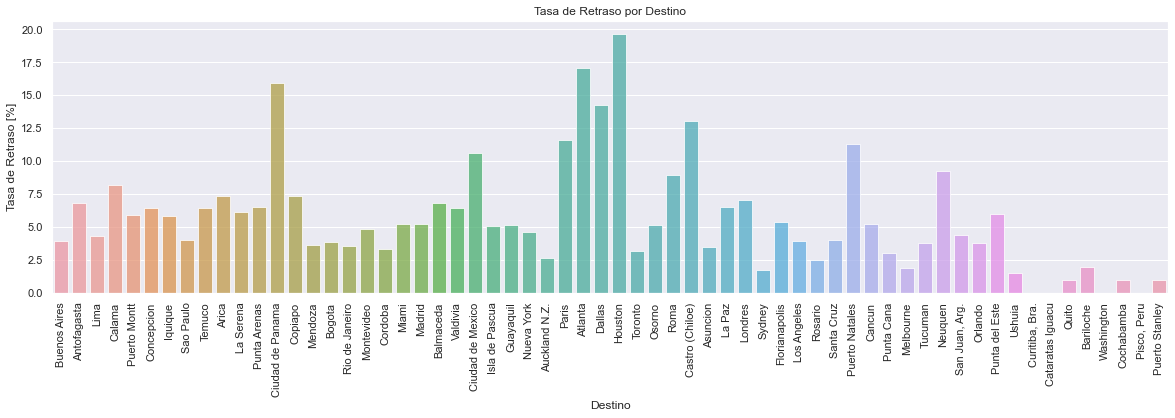

In [354]:
tasas_destinos_values = df['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(df['SIGLADES'].value_counts().index, tasas_destinos['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Destino')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [355]:
tasas_aerolineas = calcular_tasa(df, 'OPERA')
tasas_aerolineas

,Tasa (%)
Grupo LATAM,5.60
Sky Airline,5.63
Aerolineas Argentinas,4.16
Copa Air,15.95
Latin American Wings,2.46
Avianca,3.76
JetSmart SPA,5.59
Gol Trans,2.81
American Airlines,14.84
Air Canada,2.19


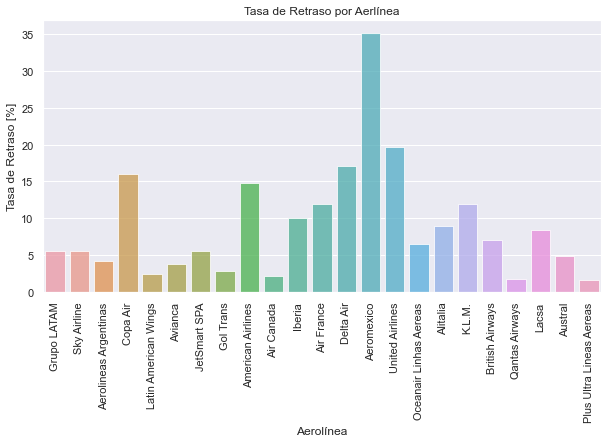

In [356]:
tasas_aerolineas_values = df['OPERA'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(tasas_aerolineas_values, tasas_aerolineas['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Aerlínea')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Aerolínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [357]:
tasas_meses = calcular_tasa(df, 'MES')
tasas_meses

,Tasa (%)
12,3.94
1,6.25
11,5.07
10,4.43
7,3.41
8,5.77
9,5.80
2,6.60
3,8.69
5,6.34


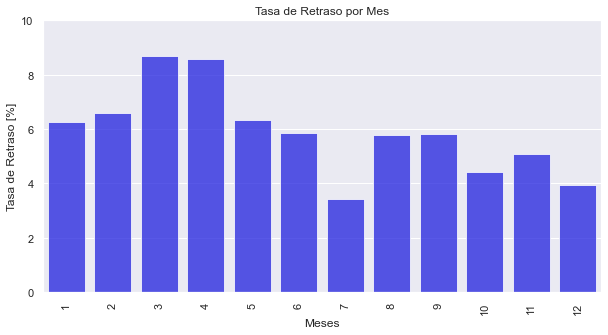

In [358]:
tasas_meses_values = df['MES'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(tasas_meses_values, tasas_meses['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Mes')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Meses', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,10)
plt.show()

In [359]:
tasas_dias = calcular_tasa(df, 'DIANOM')
tasas_dias

,Tasa (%)
Viernes,4.50
Jueves,5.01
Lunes,4.95
Domingo,6.21
Miercoles,5.85
Martes,5.91
Sabado,6.13


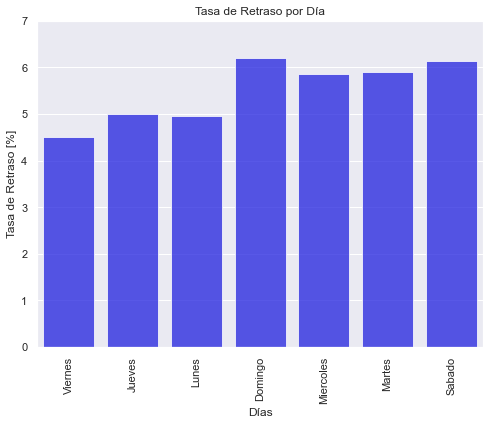

In [360]:
tasas_dias_values = df['DIANOM'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (8,6))
sns.barplot(tasas_dias_values, tasas_dias['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Día')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Días', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,7)
plt.show()

In [361]:
tasas_temporada = calcular_tasa(df, 'temporada_alta')
tasas_temporada

,Tasa (%)
0,5.58
1,5.08


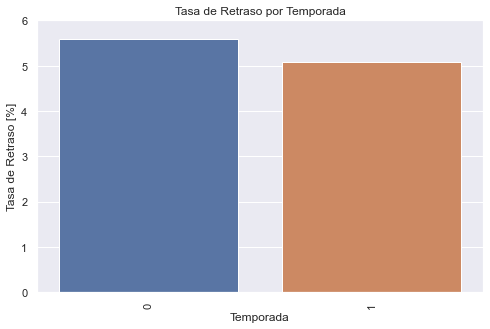

In [362]:
tasas_temporada_values = df['temporada_alta'].value_counts().index

plt.figure(figsize = (8, 5))
sns.set(style="darkgrid")
sns.barplot(tasas_temporada_values, tasas_temporada['Tasa (%)'])
plt.title('Tasa de Retraso por Temporada')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Temporada', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,6)
plt.show()

In [363]:
tasas_tipovuelo = calcular_tasa(df, 'TIPOVUELO')
tasas_tipovuelo

,Tasa (%)
N,6.64
I,4.43


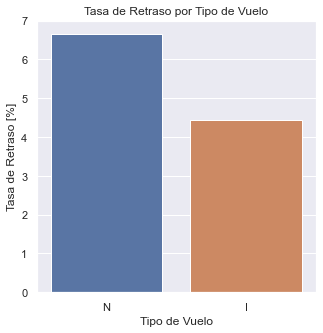

In [364]:
tasas_tipovuelo_values = df['TIPOVUELO'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(tasas_tipovuelo_values, tasas_tipovuelo['Tasa (%)'])
plt.title('Tasa de Retraso por Tipo de Vuelo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.ylim(0,7)
plt.show()

In [365]:
tasa_periododia = calcular_tasa(df, 'periodo_dia')
tasa_periododia

,Tasa (%)
tarde,5.06
mañana,6.21
noche,5.02


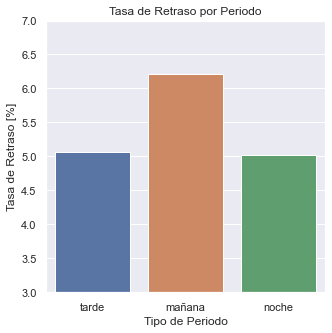

In [366]:
tasas_periodo_values = df['periodo_dia'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(tasas_periodo_values, tasa_periododia['Tasa (%)'])
plt.title('Tasa de Retraso por Periodo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Periodo', fontsize=12)
plt.ylim(3,7)
plt.show()

* ¿Qué variables esperarías que más influyeran en predecir atrasos?

Me parece que las que más podrían influir serían:
* **Aerolíneas**: Dependiendo de la calidad de gestión de cada aerolínea puede ser que afecte en sus programaciones. También puede que afecte el tipo de aerolínea, si es una low cost por ejemplo, estas llevan menos equipaje ya que es un costo extra para cada pasajero por lo que el tiempo de carga es menor, corriendo menor riesgo de retraso. 
* **Tipo de Vuelo**: esto puede afectar en cómo esté el clima del país de destino. Por ejemplo si se tiene que volar a argentina y se tiene que cruzar por la cordillera y hay un mal clima, es posible que se tenga que esperar un rato para poder salir.
* **Mes**: Esto va un poco de la mano con lo anterior, si es que es un mes del año donde el clima no es lo suficientemente adecuado, se tendría que esperar.  
 

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [367]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [368]:
data = shuffle(df[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'atraso_15']], random_state = 111)

In [369]:
features = pd.concat([pd.get_dummies(data['OPERA'], prefix = 'OPERA'),pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data['MES'], prefix = 'MES')], axis = 1)
label = data['atraso_15']

# ---------------------------------------------------------------------------------------------------------------

# I.- Agregado Adolfo Pinto Hurel

In [370]:
# Visualizacion dataset previo a entrenamiento de las variables independientes (características)
features.head()

,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,OPERA_Copa Air,...,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,MES_11,MES_12
13375,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
35799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
48176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
58675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
23374,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [371]:
# Conteo (numero de registros,numero de variables)
features.shape

(68206, 37)

In [372]:
# Conteo (numero de registros,)
label.shape

(68206,)

In [373]:
# Cantidad de clase 0 y clase 1 en variable objetivo
label.value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

PROBLEMA: CLASES DESBALANCEADAS.

SINTOMA: SE PRODUCE UN SESGO DE PREDICCIÓN MAYOR HACIA LA CLASE CON MAS MUESTRAS.

POSIBLES SOLUCIONES: 

1).- En Regresión Logistica: 

Darle más peso a las muestras de la clase minoritaria, ponderando más las muestras de la clase que uno prefiera (la menor), con esto ocurrira el fenomeno de ajustarse mejor a esa clase y con eso la prediccion asociada a ella mejora.

2).- En XGBoost:

Puede aumentarse el número de árboles, y asi ir corrigiendo los errores de árboles anteriores.

3).- Un metodo que las equilibre: Sobremuestreo o Submuestreo. 

4).- Generar Muestras Sintéticas para la clase minoritaria, asi se construye un sesgo hacia ella.

5).- Cambiar Metricas de Evaluación.

6).- Usar algoritmos tipo Boosting o Stacking.

7).- Usar Aprendizaje por Refuerzo.

8).- Una Combinación de Algunas de las Anteriores.


# I.- Fin Agregado Adolfo Pinto Hurel

# ---------------------------------------------------------------------------------------------------------------

In [374]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.33, random_state = 42)

In [375]:
x_train.shape, x_test.shape

((45698, 37), (22508, 37))

In [376]:
y_train.value_counts('%')

0    0.813799
1    0.186201
Name: atraso_15, dtype: float64

In [377]:
y_test.value_counts('%')

0    0.81762
1    0.18238
Name: atraso_15, dtype: float64

#### Utilizando Regresión logística

In [378]:
logReg = LogisticRegression()
model = logReg.fit(x_train, y_train)

In [379]:
y_pred = model.predict(x_test)

#### Métricas Regresión Logística

In [380]:
confusion_matrix(y_test, y_pred)

array([[18311,    92],
       [ 3985,   120]], dtype=int64)

In [381]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



#### Utilizando XGBoost

In [382]:
import xgboost as xgb
from xgboost import plot_importance

In [383]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
modelxgb = modelxgb.fit(x_train, y_train)

[18:54:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [384]:
y_predxgb = modelxgb.predict(x_test)

#### Métricas XGBoost

In [385]:
confusion_matrix(y_test, y_predxgb)

array([[18359,    44],
       [ 4017,    88]], dtype=int64)

In [386]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



#### Utilizando XGBoost dejando Features más importantes 

In [387]:
modelxgb.feature_importances_

array([0.01000502, 0.03812766, 0.0774048 , 0.        , 0.        ,
       0.05326247, 0.        , 0.        , 0.        , 0.11452038,
       0.        , 0.05899746, 0.00510737, 0.        , 0.00056586,
       0.        , 0.        , 0.03438188, 0.        , 0.00872514,
       0.0687452 , 0.03494434, 0.02305363, 0.17575102, 0.        ,
       0.01610017, 0.00777403, 0.02387431, 0.00835021, 0.01279221,
       0.01183943, 0.06969901, 0.00991499, 0.01740215, 0.03937674,
       0.02739293, 0.05189164], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 936x720 with 0 Axes>

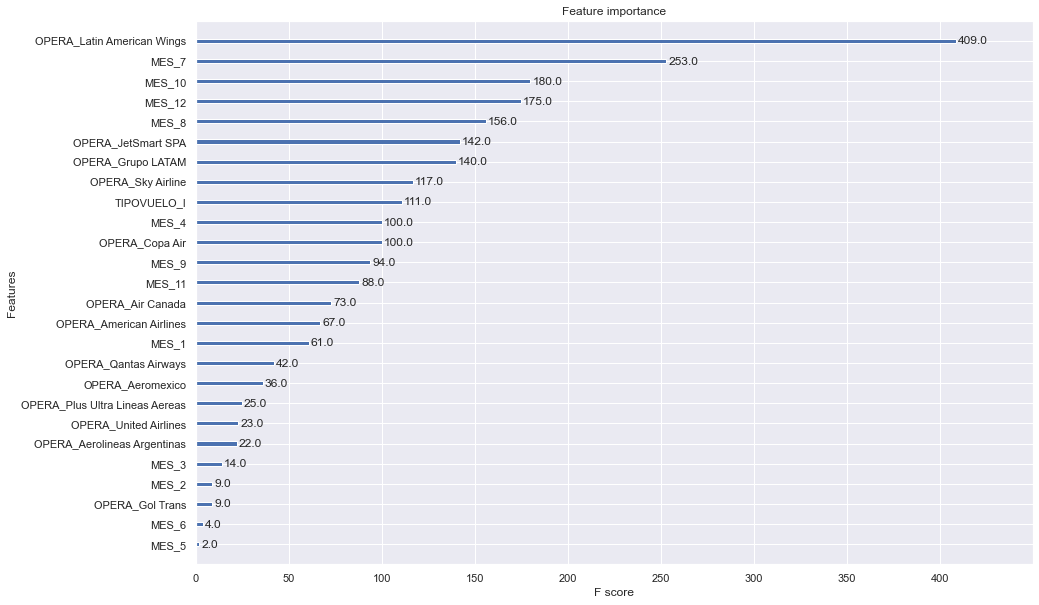

In [388]:
plt.figure(figsize = (13,10))
plot_importance(modelxgb)

# ---------------------------------------------------------------------------------------------------------------

# II.- Agregado Adolfo Pinto Hurel

PROBLEMA: VARIABLE MAL ESCRITA.

SINTOMA: EL SCRIPT DEJA DE EJECUTARSE.

SOLUCION:

1).- Detectar donde se utiliza (si es que se utiliza), la variable: Labels.

2).- Se detecta que no esta definida en el código.

3).- Se indaga en que parte del código se pretendia usar la variable Labels_, la cual recibia la asignación de Labels.

4).- Se ve que esta, se utiliza como labels_, (Con Minuscula), como parámetro del método train_test_split, es decir con la información de la variable objetivo. 

5).- Se corrigen los nombres y asignaciones de variables.

In [389]:
# features_importantes = features[['MES_7', 'TIPOVUELO_I', 'OPERA_Copa Air', 'OPERA_Latin American Wings',
#                                'MES_12', 'OPERA_Grupo LATAM', 'MES_10', 'OPERA_JetSmart SPA', 'OPERA_Air Canada',
#                                'MES_9', 'OPERA_American Airlines']]
#labels_ = labels

In [390]:
features_importantes = features[['MES_7', 'TIPOVUELO_I', 'OPERA_Copa Air', 'OPERA_Latin American Wings',
                                'MES_12', 'OPERA_Grupo LATAM', 'MES_10', 'OPERA_JetSmart SPA', 'OPERA_Air Canada',
                                'MES_9', 'OPERA_American Airlines']]

In [391]:
features_importantes.shape

(68206, 11)

In [392]:
# Esta es la asignacion correcta y el nombre de variable correcto
labels_ = label

In [393]:
labels_.shape

(68206,)

# II.- Fin Agregado Adolfo Pinto Hurel

# ---------------------------------------------------------------------------------------------------------------

In [394]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features_importantes, labels_, test_size = 0.33, random_state = 42)

In [395]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01, subsample = 1, max_depth = 10)
modelxgb = modelxgb.fit(x_train2, y_train2)

[18:54:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [396]:
y_predxgb = modelxgb.predict(x_test2)

#### Métricas XGBoost dejando Features más importantes 

In [397]:
confusion_matrix(y_test2, y_predxgb)

array([[18371,    32],
       [ 4044,    61]], dtype=int64)

In [398]:
print(classification_report(y_test2, y_predxgb))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.66      0.01      0.03      4105

    accuracy                           0.82     22508
   macro avg       0.74      0.51      0.46     22508
weighted avg       0.79      0.82      0.74     22508



### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar laperformance?

Los modelos utilizados en la sección anterior fueron:
* **Regresión Logística**: Fue seleccionado ya que es el modelo más simple para poder resolver problemas de clasificación.
* **XGBoost**: Fue seleccionado porque en general tiene un gran desempeño y entrega buenos resultados ya sea para regresión y clasificación, además es bastante rápido y facilita el tuneo de hiperparámetros.

Los resultados obtenidos con ambos modelos fueron muy malos. Se utilizó matriz de confusión para validar los resultados. La cantidad de falsos negativos fue muy alta. Una de las posibles razones, la más clara, es el desbalanceo que existe en la clase 'atraso_15'. Del total de datos un 82% corresponde a no atraso y el 18% restante a atraso.
Para poder mejorar la performance se tomaron dos decisiones, la primera aplicar un Grid Search CV sobre XGBoost para tunear de mejor manera los hiperparámetros y la segunda realizar un upsampling de la clase desbalanceada, en este caso los atrasos.



### Grid Search CV

In [399]:
from sklearn.model_selection import GridSearchCV

In [400]:
parameters = {
                'learning_rate': [0.01,0.05, 0.1],
                'n_estimators': [50, 100, 150],
                'subsample': [0.5, 0.9]
}

modelxgb_GridCV = GridSearchCV(modelxgb, param_grid = parameters,
    cv = 2, n_jobs=-1, verbose=1).fit(x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[18:56:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [401]:
y_predxgb_grid = modelxgb_GridCV.predict(x_test)

In [402]:
confusion_matrix(y_test, y_predxgb_grid)

array([[18287,   116],
       [ 3933,   172]], dtype=int64)

### Upsampling

In [403]:
data['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [404]:
#Resample
from sklearn.utils import resample

data_no_retraso = data[data['atraso_15'] == 0]
data_atraso = data[data['atraso_15'] == 1]

data_atraso_upsampled = resample(data_atraso, 
                                 replace = True,     # sample with replacement
                                 n_samples = 30000,    # to match majority class
                                 random_state = 42) # reproducible results

data_upsampled = pd.concat([data_no_retraso, data_atraso_upsampled])

In [405]:
data_upsampled['atraso_15'].value_counts()

0    55592
1    30000
Name: atraso_15, dtype: int64

In [406]:
features_upsampled = pd.concat([pd.get_dummies(data_upsampled['OPERA'], prefix = 'OPERA'),pd.get_dummies(data_upsampled['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data_upsampled['MES'], prefix = 'MES')], axis = 1)
label_upsampled = data_upsampled['atraso_15']

In [407]:
x_upsampled_train, x_upsampled_test, y_upsampled_train, y_upsampled_test = train_test_split(features_upsampled, label_upsampled, test_size = 0.33, random_state = 42)

In [408]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01, subsample = 1, max_depth = 10)
modelxgb.fit(x_upsampled_train, y_upsampled_train)

[18:56:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [409]:
y_upsampled_predxgb = modelxgb.predict(x_upsampled_test)

In [410]:
confusion_matrix(y_upsampled_test, y_upsampled_predxgb)

array([[17156,  1193],
       [ 7969,  1928]], dtype=int64)

In [411]:
modelxgb.score(x_upsampled_test, y_upsampled_test)

0.6756354882107201

In [412]:
print(classification_report(y_upsampled_test, y_upsampled_predxgb))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79     18349
           1       0.62      0.19      0.30      9897

    accuracy                           0.68     28246
   macro avg       0.65      0.56      0.54     28246
weighted avg       0.66      0.68      0.62     28246



Observando los dos métodos para incrementar la performance, se puede ver como el modelo no mejoró. Esto puede ser ya que la data creada al upsamplear no tiene ningún sentido. Si se pudiese pudiese balancear la clase tal vez los modelos tendrían un mejor desempeño.

# ---------------------------------------------------------------------------------------------------------------

# III.- Agregado Adolfo Pinto Hurel

MEJORA DEL MODELO


1.- HIPÓTESIS:
    
    1.1.- Teniendo datos reales y desbalanceados, existe un mejor algoritmo que produce el modelo de Machine Learning entre:
        1.1.1.- XGBOOST
        1.1.2.- Regresion Logistica.

        
2.- METODOLOGÍA:
         
    Se realizo una investigación cientifica en base a papers publicados, que cumplan estas condiciones: 
    2.1.- Conjunto de datos reales desbalanceados. 
    2.2.- Comparación de a lo menos estos dos algoritmos:
        2.2.1.- XGBOOST
        2.2.2.- Regresión Logistica.
    

3.- HALLAZGOS:

    3.1.- Resumen Paper: "Credit Card Fraud Detection Using Machine Learning Algorithms."   
                            Dr.A.S.MuthanandhaMurugavel1, P.Jeevitha2, R.Rajana3, R.M. Danushree
    
    "This paper investigates and checks the performance of Decision tree, An Artificial Neural Network (ANN), XG Boost and Logistic Regression algorithms on highly skewed credit card fraud dataset. The results indicate about the accuracy for Decision tree, An Artificial Neural Network (ANN), XG Boost and Logistic Regression algorithms classifiers are 90.6, 88.3, 96.2 and 97.5 respectively."
    "This paper proves that the Logistic Regression algorithm reach over 97.5% accuracy which is higher than XGBoost(96.2),Decision tree(90.27) and an Artificial neural network (ANN) (88.3).This high percentage of accuracy occurredin spite of imbalance between the number of valid and number of genuine transactions in the dataset. Being based on machine learning algorithms, the program will only increase its efficiency over time as more data is put into it.We finally observed that logistic regression gave better results."
    
    
    3.2.- Resumen Paper: "Comparing the Performance of AdaBoost, XGBoost, and Logistic Regression for Imbalanced Data."
                                    Sharmeen Binti Syazwan Lai, Nur Huda Nabihan Binti Md Shahri, Mazni Binti Mohamad, 
                                    Hezlin Binti Abdul Rahman, Adzhar Bin Rambli
    
    "The results of the simulated datasets show that logistic regression performs better than AdaBoost and XGBoost in highly imbalanced datasets, whereas in the real imbalanced datasets, AdaBoost and logistic regression demonstrated similarly good performance. All methods seem to perform well in datasets that are not severely imbalanced. Compared to AdaBoost and XGBoost, logistic regression is found to predict better for datasets with severe imbalanced ratios."    
    Finally, AdaBoost, XGBoost, and logistic regression are the best methods for handling imbalanced datasets when the imbalance is not severe; however, logistic regression is the best method for severe imbalanced datasets compared to boosting algorithm."
  
  
4.- EN EL CASO PARTICULAR DE ESTE TRABAJO:

    4.1.- Se tienen en total: 68.206 muestras.
    4.2.- Son datos reales.
    4.3.- Son clases desbalanceadas:
        4.3.1.- La Clase 0 tiene 55592 muestras. 
        4.3.2.- La Clase 1 tiene 12614 muestras.     
    4.4.- La clase minoritaria (1) corresponde al 18,49 % del total.
    
    
5.- CONCLUSIÓN:
    
    Dadas las condiciones actuales de este trabajo, que se asemejan mucho a las de los Papers citados, es decir: dataset con datos reales y clases desbalanceadas, donde se aplico Regresión Logistica y XGBoost, y basandose en lo que dicen los papers, se deberia confiar mucho mas en una Regresión Logistica para construir el modelo.
    
    Se llega a la conclusión que el modelo debe ser generado por el algoritmo: Regresión Logistica.
    
    Lo anterior hace referencia al mejor algoritmo dadas las condiciones actuales de la data, pero es claro que el rendimiento de este modelo mejorara si se consiguen más muestras de data real, en caso de no poder recolectarse, y si se hace upsampling,  debe ser Data Sintetica con Significado Estadistico, de otra forma No Sirve, pasa como ruido. En el caso que tampoco se pueda construir data sintetica de calidad, se recomienda la técnica de downsampling y/o tambien, calibrar mejor los parametros de la regresión logistica, como se explico antes, por ejemplo, dandole más peso a las muestras de la clase minoritaria, esto es lo que a continuacion se hara:

In [413]:
# Nuevo ajuste que balancea ambas clases para Regresión Logistica

weights = 'balanced'
logReg = LogisticRegression(class_weight=weights)
model_RL_B = logReg.fit(x_train, y_train)

In [414]:
# Nuevos target de predicción
y_pred = model_RL_B.predict(x_test)

In [415]:
confusion_matrix(y_test, y_pred)

array([[10958,  7445],
       [ 1477,  2628]], dtype=int64)

In [416]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.60      0.71     18403
           1       0.26      0.64      0.37      4105

    accuracy                           0.60     22508
   macro avg       0.57      0.62      0.54     22508
weighted avg       0.77      0.60      0.65     22508



La Clase 1 con menos muestras, presentaba antes, en la Regresión Logística original, un recall de 0.03, y ese es el valor que debe interesar poder mejorar, porque asi se estaran detectando mejor las muestras de esa clase.

Ahora con el ajuste de pesos que se hizo, recall subio a 0.64 para esa clase, lo que es un gran avance.

Incluso hasta mejoro el f1-score para esa clase.

In [417]:
# Almacenado del modelo basado en Regresión Logistica.

# Con este codigo se almacena en disco duro el modelo como un archivo, 
# Como se seguira trabajando en este mismo notebook la etapa de API Rest, 
# se mantiene el codigo comentado, si se requiere el archivo del modelo, 
# basta descomentarlo y ejecutarlo.

#import pickle

#with open('RL.pkl','wb') as f:
#    pickle.dump(model,f)

In [418]:
# Recuperación del modelo basado en Regresión Logistica.

# En caso de haber generado un archivo del modelo en disco duro y que 
# se quiera traer a este ambiente, a continuación el código para ello, 
# basta descomentarlo y ejecutarlo.

#import pickle

#with open('RL.pkl','rb') as f:
#    model = pickle.load(f)

# III.- Fin Agregado Adolfo Pinto Hurel

# ---------------------------------------------------------------------------------------------------------------